In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
#Loading the testing and training data
test_data = pd.read_csv('data/Testing.csv')
train_data = pd.read_csv('data/Training.csv')

In [3]:
# view dimensions of dataset
train_data.shape

(4920, 134)

In [4]:
#Cleaning training data
x = train_data.drop(['prognosis','Unnamed: 133'], axis=1)
y = train_data['prognosis']

In [5]:
#Cleaning testing data
x_test = test_data.drop(['prognosis'], axis=1)
y_test = test_data['prognosis']

In [6]:
#Logistic Regression
LRmodel = LogisticRegression()
LRmodel.fit(x,y)
LRmodel.score(x_test,y_test)

1.0

In [7]:
#Decision Tree Classifier
DCmodel = DecisionTreeClassifier()
DCmodel.fit(x,y)
DCmodel.score(x_test,y_test)

0.9761904761904762

In [8]:
#Naive Bayers Classifier
NBmodel = GaussianNB()
NBmodel.fit(x,y)
NBmodel.score(x_test,y_test)

1.0

In [9]:
#Support Vectors
SVmodel = SVC(kernel='linear', C=1)
SVmodel.fit(x,y)
SVmodel.score(x_test,y_test)

1.0

In [10]:
#Softmax Classifier
SCmodel = LogisticRegression(random_state=0, multi_class='multinomial', max_iter=1000)
SCmodel.fit(x,y)
SCmodel.score(x_test,y_test)

1.0

In [ ]:
# PCA 
LR_list = []
DC_list = []
NB_list = []
SV_list = []
SC_list = []
features = []
for i in range(131):
    pca = PCA(n_components=(i+1))
    x_pca = pca.fit_transform(x)
    x_test_pca = pca.transform(x_test)
    LRmodel.fit(x_pca, y)
    DCmodel.fit(x_pca, y)
    NBmodel.fit(x_pca, y)
    SVmodel.fit(x_pca, y)
    SCmodel.fit(x_pca, y)

    LR_list.append(accuracy_score(y_test, LRmodel.predict(x_test_pca))*100)
    DC_list.append(accuracy_score(y_test, DCmodel.predict(x_test_pca))*100)
    NB_list.append(accuracy_score(y_test, NBmodel.predict(x_test_pca))*100)
    SV_list.append(accuracy_score(y_test, SVmodel.predict(x_test_pca))*100)
    SC_list.append(accuracy_score(y_test, SCmodel.predict(x_test_pca))*100)
    features.append(i+1)

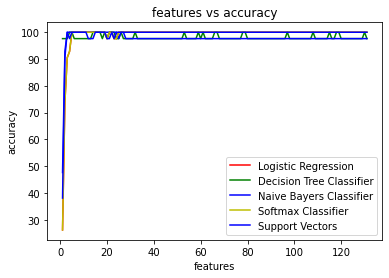

In [12]:
#Plotting
plt.plot(features, LR_list, color='r', label='Logistic Regression')
plt.plot(features, DC_list, color='g', label='Decision Tree Classifier')
plt.plot(features, NB_list, color='b', label='Naive Bayers Classifier')
plt.plot(features, SC_list, color='y', label='Softmax Classifier')
plt.plot(features, SV_list, color='b', label='Support Vectors')
plt.xlabel("features")
plt.ylabel("accuracy")
plt.title("features vs accuracy")

plt.legend()

plt.show()

In [13]:
#Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(x,y)
accuracy_score(y_test, rf.predict(x_test))*100

97.61904761904762

In [14]:
#Tuning max_depth
performance_max_depth = []
max_depth = []
for i in range(15):
    rf_md = RandomForestClassifier(random_state=0, max_depth=(i+1))
    rf_md.fit(x,y)
    performance_max_depth.append(f1_score(y_test, rf_md.predict(x_test), average='micro'))
    max_depth.append((i+1))


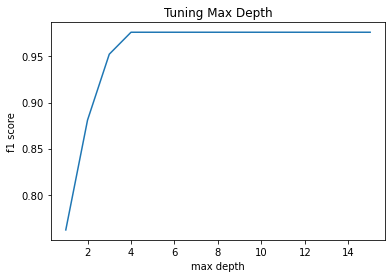

In [15]:
#Plotting the corresponding graph
plt.plot(max_depth, performance_max_depth)
plt.xlabel("max depth")
plt.ylabel("f1 score")
plt.title("Tuning Max Depth")
plt.show()

In [ ]:
#Tuning criterion
performance_criterion = []
criterion = ['gini', 'entropy', 'log_loss']

for i in range(3):
    rf_c = RandomForestClassifier(random_state=0, criterion = criterion[i])
    rf_c.fit(x,y)
    performance_criterion.append(accuracy_score(y_test, rf_c.predict(x_test)))

plt.bar(criterion, performance_criterion)
plt.xlabel("Criterion")
plt.ylabel("Accuracy Score")
plt.ylim(0.8,1.20)
plt.title("Tuning criterion")
plt.show()

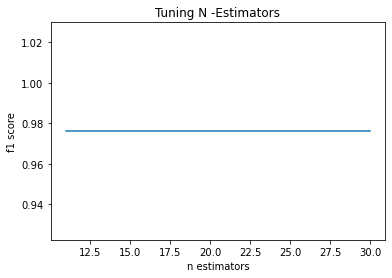

In [17]:
#Tuning n_estimators
performance_n_estimators = []
n_estimators = []
for i in range(20):
    rf_ne = RandomForestClassifier(random_state=0, n_estimators=10+(i+1))
    rf_ne.fit(x,y)
    performance_n_estimators.append(f1_score(y_test, rf_ne.predict(x_test), average='micro'))
    n_estimators.append(10+(i+1))

plt.plot(n_estimators, performance_n_estimators)
plt.xlabel("n estimators")
plt.ylabel("f1 score")
plt.title("Tuning N -Estimators")
plt.show()

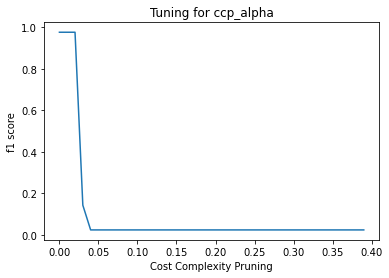

In [18]:
#Tuning ccp_alpha
performance_ccp_alpha = []
ccp_alpha = []
for i in range(40):
    rf_ccp = RandomForestClassifier(random_state=0, ccp_alpha=(i)/100)
    rf_ccp.fit(x,y)
    performance_ccp_alpha.append(f1_score(y_test, rf_ccp.predict(x_test), average='micro'))
    ccp_alpha.append((i)/100)

plt.plot(ccp_alpha, performance_ccp_alpha)
plt.xlabel("Cost Complexity Pruning")
plt.ylabel("f1 score")
plt.title("Tuning for ccp_alpha")
plt.show()

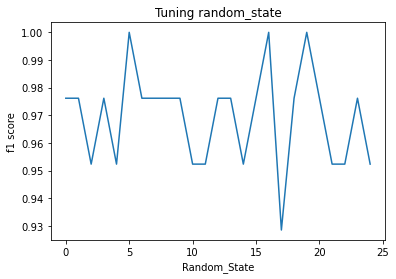

In [ ]:
#Tuning random_state
performance_random_state = []
random_state = []
for i in range(25):
    rf_rs = RandomForestClassifier(random_state=i, max_depth=4, criterion='entropy', n_estimators=19, ccp_alpha=0.0)
    rf_rs.fit(x,y)
    performance_random_state.append(f1_score(y_test, rf_rs.predict(x_test), average='micro'))
    random_state.append(i)

plt.plot(random_state, performance_random_state)
plt.xlabel("Random_State")
plt.ylabel("f1 score")
plt.title("Tuning random_state")
plt.show()

In [19]:
#Tuned Random forest classifier
rf_tuned = RandomForestClassifier(random_state=5, max_depth=4, criterion='entropy', n_estimators=19, ccp_alpha=0.0)
rf_tuned.fit(x,y)
print("Accuracy score: "+str(accuracy_score(y_test, rf_tuned.predict(x_test))*100))

Accuracy score: 100.0
